In [5]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import glob
# Define paths
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
models_path = os.path.join(project_root, 'models')
data_path = os.path.join(project_root, 'data', 'processed')

print(f"Project Root: {project_root}")

Project Root: C:\Users\Thinkpad\Desktop\USD-Bill-Classification


In [6]:
# Create a test generator to get true labels and predictions
image_size = (150, 150)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    data_path,
    target_size=image_size,
    batch_size=1, # Use batch size 1 for accurate predictions
    class_mode='categorical',
    shuffle=False # Do not shuffle to maintain order
)

Found 3912 images belonging to 12 classes.


In [7]:
# Find the latest trained model
list_of_models = glob.glob(os.path.join(models_path, '*.keras'))
if not list_of_models:
    print("No model found. Please run `train_model.py` first.")
else:
    latest_model_path = max(list_of_models, key=os.path.getctime)
    print(f"Loading model from: {latest_model_path}")
    model = load_model(latest_model_path)
    
    # Evaluate the model
    loss, accuracy = model.evaluate(test_generator)
    print(f"Model Loss: {loss:.4f}")
    print(f"Model Accuracy: {accuracy:.4f}")

Loading model from: C:\Users\Thinkpad\Desktop\USD-Bill-Classification\models\usd_bill_classifier_20250913-073339.keras


C:\Users\Thinkpad\Desktop\USD-Bill-Classification\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3912/3912 ━━━━━━━━━━━━━━━━━━━━ 57s 14ms/step - accuracy: 0.9880 - loss: 0.0640
Model Loss: 0.0640
Model Accuracy: 0.9880


3912/3912 ━━━━━━━━━━━━━━━━━━━━ 56s 14ms/step


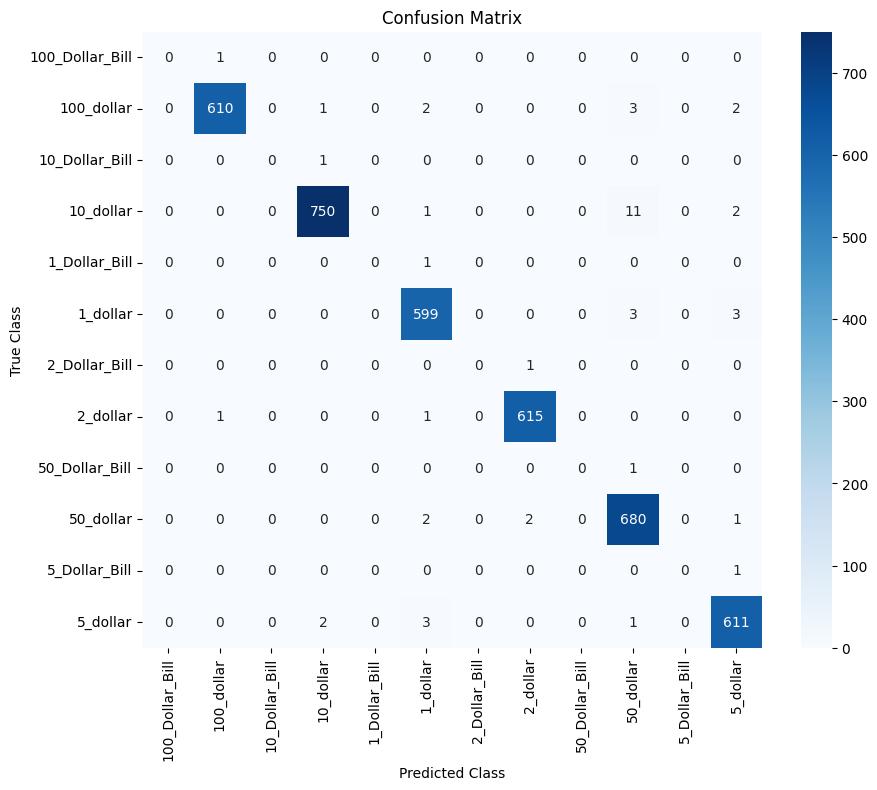

In [8]:
# Predict the output on the test data
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()